<center><h1>INTERNSHIP</h1></center>
<h2>Name &nbsp;&nbsp;&nbsp;: S.CHARAN RAJU </h2>


<h3>Attributes:</h3>

<h4>Demographic:</h4></br>
<br>
Sex: male or female(Nominal)<br>
Age: Age of the patient(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)</br>
<br>Education: no further information provided<br>
<h4>Behavioral:</h4><br>
Current Smoker: whether or not the patient is a current smoker (Nominal)</br>
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
<h4>Information on medical history:</h4><br>
<br>
BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
Diabetes: whether or not the patient had diabetes (Nominal)<br>
<h4>Information on current medical condition:</h4>
<br>
Tot Chol: total cholesterol level (Continuous)<br>
Sys BP: systolic blood pressure (Continuous)<br>
Dia BP: diastolic blood pressure (Continuous)<br>
BMI: Body Mass Index (Continuous)<br>
<br>
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
Glucose: glucose level (Continuous)<br>
<h4>Target variable to predict:</h4>
<br>
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)<br>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:\\Users\\Charan\\Downloads\\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [2]:
#data.head()
#print(data.shape)
#print(data.info())

In [3]:
#print(data[data['TenYearCHD']==1].count())

In [4]:
#data.isnull().sum()

<h3>we have to fill the null values using mean this gives the absolute result i think</h3>

In [5]:
df.fillna(df.mean(), inplace=True)

In [6]:
#data.isnull().sum()

In [7]:
a=list(df['age'].unique())
a.sort()
d={}
for i in range(len(a)):
    c=0
    for j in range(len(df)):
        if df['age'][j]==a[i]:
            if df['TenYearCHD'][j]==1:
                c+=1
    d[a[i]]=c
print(d)
print(max(d.values()))

{32: 0, 33: 0, 34: 0, 35: 2, 36: 3, 37: 4, 38: 8, 39: 6, 40: 15, 41: 11, 42: 14, 43: 13, 44: 16, 45: 14, 46: 16, 47: 23, 48: 21, 49: 24, 50: 23, 51: 29, 52: 32, 53: 23, 54: 18, 55: 24, 56: 27, 57: 26, 58: 31, 59: 30, 60: 26, 61: 25, 62: 25, 63: 32, 64: 21, 65: 20, 66: 15, 67: 17, 68: 8, 69: 1, 70: 1}
32


In [16]:
d1={}
for k,v in d.items():
    #print(type(int(k)),v)
    if int(k)>=32 and int(k)<=40:
        #print(k,v)
        if '32-40' in d1:
            d1['32-40']+=v
        else:
            d1['32-40']=1
    
    if int(k)>=41 and int(k)<=50:
        if '41-50' in d1:
            d1['41-50']+=v
        else:
            d1['41-50']=1
    
    if int(k)>=51 and int(k)<=60:
        if '51-60' in d1:
            d1['51-60']+=v
        else:
            d1['51-60']=1
    
    if int(k)>=61 and int(k)<=70:
        if '61-70' in d1:
            d1['61-70']+=v
        else:
            d1['61-70']=1
print(d1)

{'32-40': 39, '41-50': 165, '51-60': 238, '61-70': 141}


In [19]:

df.plot.bar(x = list(d1.keys()), y =d1.values() , rot = 40,figsize=(25,10))

KeyError: "None of [Index(['32-40', '41-50', '51-60', '61-70'], dtype='object')] are in the [columns]"

NameError: name 'data' is not defined

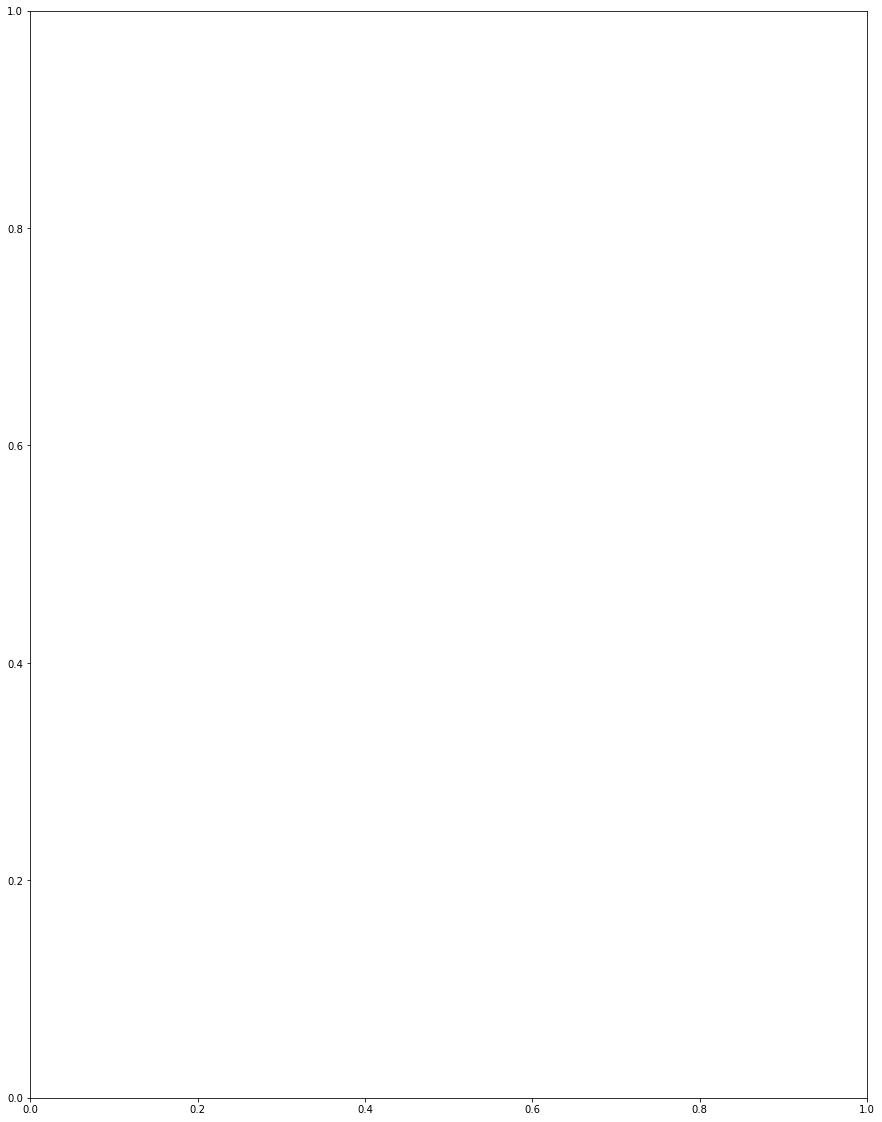

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize = (15,10))
df_corr = data.corr()
sns.heatmap(df_corr,annot=True)

Conclusions from Heatmap:

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [ ]:
df=data
df = df.drop(['education'], axis=1)

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

We will only keep those features that have the strongest relationship with the output variable. These features are:

Systolic Blood Pressure
Glucose
Age
Cholesterin
Cigarettes per Day
Diastolic Blood Pressure
Hypertensive
Diabetes
Blood Pressure Medication
Gender

In [ ]:
# Create new dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [ ]:
# Checking for outliers
df.describe()
sns.pairplot(df)

In [ ]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

In [ ]:
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)
df_clean = df

# Feature Scaling 
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [ ]:
df_scaled.describe()
df.describe()

# split

In [ ]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 65 % - 35 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [ ]:
print(len(X_train))
print(len(X_test))

# Resampling imbalanced Dataset

In [ ]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [ ]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)
normalized_df = pd.concat([CHD_df, non_CHD_df])
normalized_df.TenYearCHD.value_counts()
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

# Model Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

# Modelling & Evaluation (without Pipeline) 
<h1><text-align='center'>Logistic Regression</h1>

In [ ]:
# logistic regression again with the balanced dataset
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

In [ ]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# 3) Create a logistic regression model using all variables 

In [ ]:
from sklearn import linear_model
import pandas as pd
regress=linear_model.LogisticRegression()
df=pd.read_csv("C:\\Users\\Charan\\Downloads\\framingham.csv")
df

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df1=df.values
train_x=(df1[:,0:14])
train_y=df1[:,15]
print(train_x.shape)
print(train_y.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
a=MinMaxScaler()
train_x=a.fit_transform(train_x)
print(train_x)

In [ ]:
regress.fit(train_x,train_y)
print("co-efficient:",regress.coef_)
print("Intercept:",regress.intercept_)

In [ ]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
data['pred']=y_predicted

In [ ]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(train_y,y_predicted))
print('confusion matrix:',metrics.confusion_matrix(train_y,y_predicted))


In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

In [ ]:
df = pd.DataFrame(data)
y=df
y

In [ ]:
x=np.array(y)
x

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_Kmeans = kmeans.predict(x)
print(y_Kmeans)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 9], x[:, 10], c=y_Kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 9], centers[:, 10],c='blue')

# CONCLUSION

Age is slightly contributing to sysBP if the age is increasing then it is a slight chance of getting systolic blood pressure 
And we have high positive correlation with sysbp and blood pressure which is a high chance of getting affected if we get sysbp
Those who have suffering from hyper tension they might have an high chance of getting blood pressure.And the body mass index is correlated with blood pressure if the BMI increases thrn there is a chance of getting blood pressure  

If we want to launch our product According to Demographic Wise If we choose age as an factor .The diseses are increasing based on the age it is directly propotional to the Blood pressure and Diabetis. so if we launch our product where the people in the area are mostly older then our business will be succeseded.